# D212 Task 1 Clustering Techniques

Aaron Balke

S# 011005116

December 24th, 2023

# Part I: Research Question

## A1. Question

Using KMeans clustering, can we group patients by features heavily correlated with the length of their initial hospital visits?

## A2. Goals

The goal is to create a KMeans clustering model that can group patients effectively. The model will be evaluated using the Average Silhouette Score, and a good model will have a value > 0. I hope that through is analysis we can gain insights into what patient characteristics are related to the length of their stay. Patients with longer hospital stays will use more human and medical resources. With clustering, we may be able to see based on Initial Days which resources will have to be available and on stand-by based on correlated features, for example, if being able to tell if a patient will stay longer will allow our hospital system to allocate a higher amount of meals for that patient.

# Part II: Technique Justification

## B1. Justification

KMeans Clustering uses vector quantization to group data into k-number of clusters. Each cluster has a center point chosen, and then the data points are grouped by their distance to the center of each cluster. The hopeful outcome is data points clustered by similar features, in an unsupervised way. We hope to group points by the features most correlated to Initial_days, label each data point by its cluster, and have meaning derived and insights to the Initial_days variable based on the correlated cluster. (Sharma)(Bonthu)

## B2. Assumption

KMeans clustering is a distance-based algorithm, and so it suffers from many of the same problems as KNN classification. Notably, the data must be scaled. The magnitudes of different variables have to be scaled to be the same, or else certain variables will skew outcomes. This also means categorical variables cannot be used for analysis, only continuous variables. (Sharma)

## B3. Packages and Libraries

1. Python (3.10.9): I will be using Python as my programming language since it is a straightforward language, has strong data analysis support, and is the language I am most familiar with.
2. Jupyter Notebook (6.5.2): I will be running Python in a Juypter Notebook environment since Jupyter provides checkpoint functionality. This means data will not need to be loaded runtime, but rather its state is stored for later use.
3. Pandas: The Pandas package provides useful data science structures to Python in the form of DataFrames. Dataframes allow for easier manipulation of larger datasets. This is much easier than the standard list/arrays provided by Python.
3. Numpy: The Numpy package provides to this situation efficient scientific computing, and NaN values to simplify data completeness operations.
4. Seaborn & Matplotlib: The Seaborn & Matplotlib packages will provide tools to help visualize the dataset and deliverables these will help with validation and reporting.
5. Sklearn: Provides StandardScaler for Scaling data, Silhouette metrics for choosing optimal clusters, and evaluating clusters, and the KMeans model object for analysis.

# Part III: Data Preparation

## C1. Data Preprocessing Goal

As mentioned previously in the assumptions, KMeans is a distance-based analysis. We will require scaled data before model input. To do this we will use StandardScaler from sklearn. Additionally, the data can only be continuous features, which limits our dataset greatly.

## C2. Variables

| Feature            | Type                    |
|:-------------------|:------------------------|
| Lat                | Quantitative Continuous |
| Lng                | Quantitative Continuous |
| Income             | Quantitative Continuous |
| VitD_levels        | Quantitative Continuous |
| Initial_days       | Quantitative Continuous |
| TotalCharge        | Quantitative Continuous |
| Additional_charges | Quantitative Continuous |

## C3. Preparation Steps

Since we are not involving Categorical or Boolean features, there is no need to complete data type conversions or dummy feature creations.

1. Drop Unused Columns: We only want to keep the above-mentioned features
2. Scale Data: All Data has to be on the same scale for distance based analysis

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Data Import
df = pd.read_csv('../medical_clean.csv')

In [2]:
# Drop Unused Features
df = df[['Lat', 'Lng', 'Income', 'VitD_levels', 'Initial_days', 'TotalCharge', 'Additional_charges']]

In [3]:
# Scale Data, then convert from np array to DataFrame
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Verify Scaling (Should have Std of 1 or very close to)
scaled_df.std()

Lat                   1.00005
Lng                   1.00005
Income                1.00005
VitD_levels           1.00005
Initial_days          1.00005
TotalCharge           1.00005
Additional_charges    1.00005
dtype: float64

## C4. Export Data

In [4]:
#Export Data
scaled_df.to_csv('d212_task1_clean.csv', index=False)

# Part IV: Analysis

## D1. Optimal Clusters

The first step for our analysis will be to choose the features, this will be done by getting the two highest correlated features to Initial_days.

After this, we will use 2 methods to get the optimal number of clusters:
1. The Inertia / Elbow method, which runs a KMeans model for a range of k-clusters, and is evaluated based on the angle (elbow) of the Within-Cluster-Sum-of-Square (WCSS) plot.

Inertia is the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. (Codecademy)

2. The Silhouette Score Method, which runs a KMeans model for a range of k-clusters, and is evaluated based on how distinct the clusters are, using the silhouette coefficient. The higher value the better.

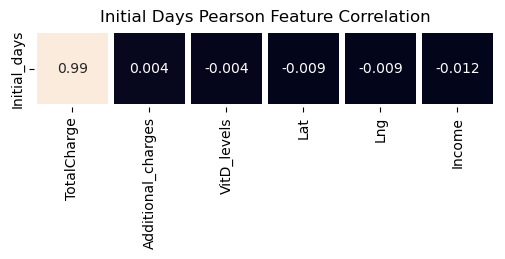

In [5]:
# Check Feature Correlation of Variable to Initial_days

# Get Correlation of just Initial Days, Sorted
cor = scaled_df.corr().head(5).tail(1).round(3)
cor.drop('Initial_days', axis=1, inplace=True)
cor.sort_values(by='Initial_days', axis=1, ascending=False, inplace=True)

# Plot heatmap
plt.figure(figsize=(12,1))
sns.heatmap(cor, annot=True, square=True, linewidths=3, cbar=False)
plt.title('Initial Days Pearson Feature Correlation')
plt.show()

In [6]:
# Create new Dataframe of just correlated features
cluster_df = scaled_df[['TotalCharge', 'Additional_charges']]

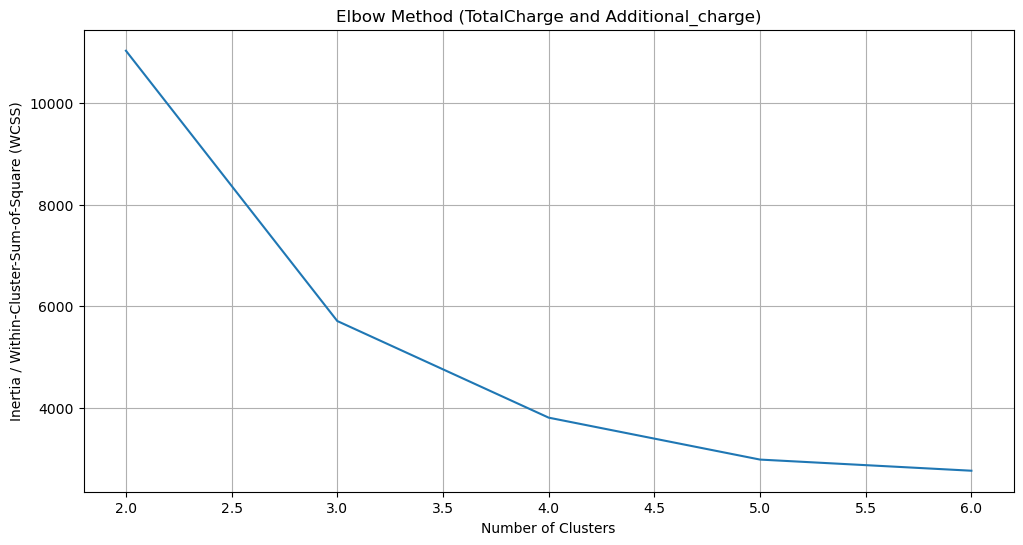

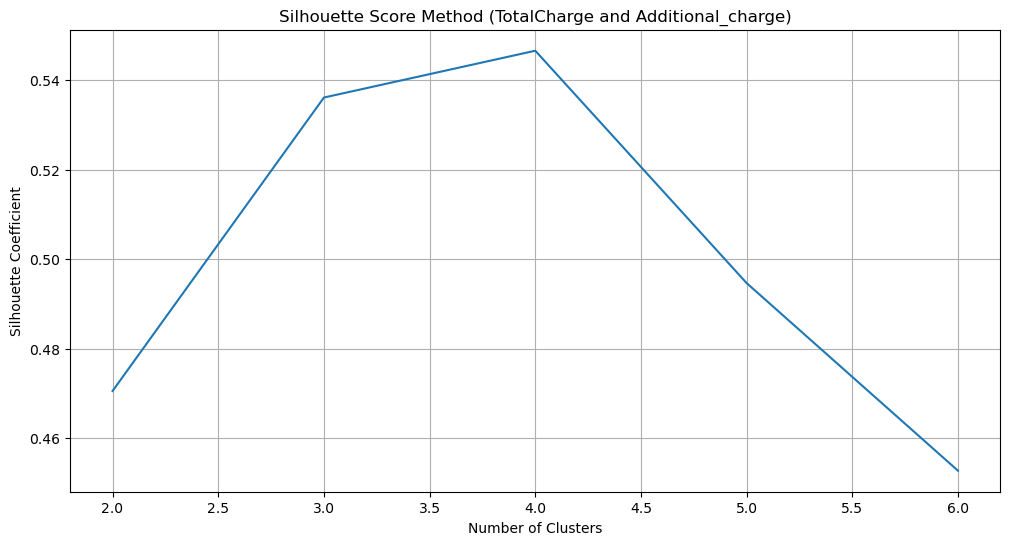

In [7]:
# Inertia and Elbow Method ("Elbow in Graph is Optimal Number of Clusters")
# Silhouette Score Range must start at 2

# Define K Range
k_range = range(2, 7)

# Initialize Lists for Scores
inertia = []
silhouette_coeff = []

for k in k_range:
    # Initialize Model with k-clusters
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init='auto',
    )
    
    kmeans.fit(cluster_df)
    
    # Append Inertia Value
    inertia.append(kmeans.inertia_)
    
    # Evaluate and Append Silhouette Score
    score = silhouette_score(
        cluster_df,
        kmeans.labels_
    )
    silhouette_coeff.append(score)

# Plot Inertia / Elbow Method
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(k_range, inertia)
plt.title(f"Elbow Method (TotalCharge and Additional_charge)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia / Within-Cluster-Sum-of-Square (WCSS)")
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(k_range, silhouette_coeff)
plt.title(f"Silhouette Score Method (TotalCharge and Additional_charge)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()   

## D2. Cluster Analysis

The previous Elbow Plot implies either 3,4, or 5 has optimal plots, the elbow is not very aggressive. However, the Silhouette Score Plot shows us that 4 clusters narrowly beat our 3 clusters. Moving forward we will use 4 clusters in our analysis. Our analysis will use a KMeans object from sklearn, with 4 clusters, fitted to our cluster data. A prediction will be made for which cluster the data belongs to, and then we will plot the clusters.

In [8]:
# Fit and Predict clusters using KMeans, append to DataFrame
km = KMeans(n_clusters=4, n_init='auto')
km.fit(cluster_df)
y_pred = km.predict(cluster_df)
df['Clusters'] = y_pred
df.head()

,Lat,Lng,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges,Clusters
0,34.34960,-86.72508,86575.93,19.141466,10.585770,3726.702860,17939.403420,3
1,30.84513,-85.22907,46805.99,18.940352,15.129562,4193.190458,17612.998120,3
2,43.54321,-96.63772,14370.14,18.057507,4.772177,2434.234222,17505.192460,3
3,43.89744,-93.51479,39741.49,16.576858,1.714879,2127.830423,12993.437350,1
4,37.59894,-76.88958,1209.56,17.439069,1.254807,2113.073274,3716.525786,1


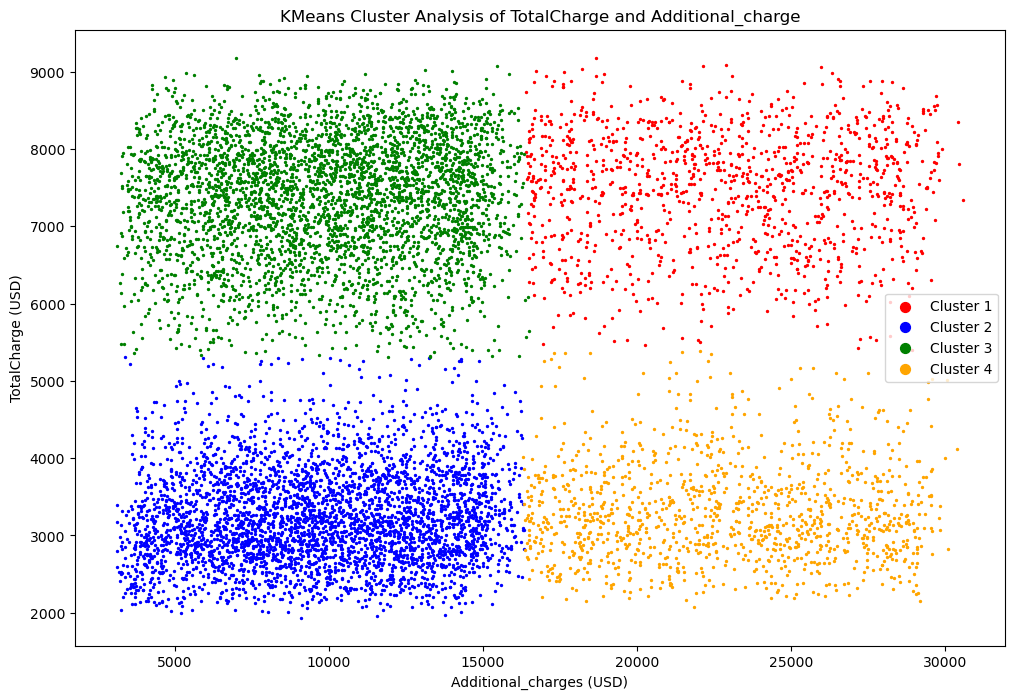

In [9]:
# Create DataFrames for Individual Clusters
gp1 = df[df.Clusters==0]
gp2 = df[df.Clusters==1]
gp3 = df[df.Clusters==2]
gp4 = df[df.Clusters==3]

# Plot Individual Clusters
plt.figure(figsize=(12,8))
plt.scatter(gp1.Additional_charges, gp1.TotalCharge, c='red', s=2, label='Cluster 1')
plt.scatter(gp2.Additional_charges, gp2.TotalCharge, c='blue', s=2, label='Cluster 2')
plt.scatter(gp3.Additional_charges, gp3.TotalCharge, c='green', s=2, label='Cluster 3')
plt.scatter(gp4.Additional_charges, gp4.TotalCharge, c='orange', s=2, label='Cluster 4')

# Cluster Plot
plt.legend(loc='best', markerscale=5)
plt.title(f"KMeans Cluster Analysis of TotalCharge and Additional_charge")
plt.xlabel(f'Additional_charges (USD)')
plt.ylabel(f'TotalCharge (USD)')
plt.show()    

# Part V: Data Summary and Implications

## E1. Cluster Quality

Visually, we can see 4 distinct clusters created from our analysis, that follow the distributions of data points logically. To confirm this, we will get an average silhouette score. Silhouette Scores range from -1 to 1. A Score greater than 0 shows the model can distinguish the clusters, and a score under 0 shows the model cannot.

In [10]:
# Average Silhouette Score for all Clusters
silhouette_avg = silhouette_score(cluster_df, km.labels_)
print(f"Average Silhouette Score: {silhouette_avg.round(2)}")

Average Silhouette Score: 0.55


## E2. Results and Implications

Our analysis was effective at creating clusters, an Average Silhouette Score of 0.55 shows us it can distinguish the groups effectively. The harder question to answer is the implications of the analysis. When it comes to the Clustered Features, TotalCharge, and Additional_charges, we can easily split them into four groups:
1. High TotalCharge, Low Additional_charges
2. High TotalCharge, High Additional_charges
3. Low TotalCharge, Low Additional_charges
4. Low TotalCharge, High Additional_charges

However, on their own, these groups do not provide much insight into our Research Question, so we have to aggregate our dataset with predicted clusters to see if a pattern is visible with our Initial_days variable.

In [11]:
# Aggregate by Cluster
df.groupby('Clusters').agg({
    'Initial_days': 'mean',
    'Additional_charges': 'mean',
    'TotalCharge': 'mean'}).round(2)

,Initial_days,Additional_charges,TotalCharge
Clusters,,,
0,59.76,22878.50,7470.07
1,9.45,9768.67,3239.44
2,59.80,9897.95,7363.64
3,9.22,22883.52,3316.38


Unfortunately, even with effective clusters, the clusters do not provide much insight into the Initial_days feature. I believe this is because of the heavy correlation between Initial_days and TotalCharges of 99%. We can see this reflected in the clusters, a low TotalCharge means a significantly shorter initial hospital visit, however, the additional_charges variable barely makes a difference in the Initial_days feature, only changing the mean value by 2-3%. While the cluster was effective, I do not believe it provided any assistance in answering the research question.

## E3. Limitation

The biggest limitation of our analysis was that the KMeans model requires continuous variables. Of our 50+ features, only 7 were continuous, limiting the pool of available data greatly. Additionally, the variables we did have were not health-related. Lat, Lng, and Income were more general data, and TotalCharge and Additional_charges were financial that were added after and are related to the patient visit. The only health-related feature we had was Vitamin D Levels. I believe if we had continuous HighBlood pressure (pulse, systolic, diastolic), Overweight (BMI), and individual blood test continuous variables, we could have made a more insightful analysis.

## E4. Recommendation

My recommendation is to not use this analysis for any conclusions at this time, since we could not find any patterns between our clusters and the Initial_days variable. Additionally, since this is the second or third time I have run into problems related to having binary values for data that was originally measured as continuous, such as High Blood Pressure or Overwieght, I would request our hospital system begin recording, or begin sharing data in a continuous form to allow for better overall analysis.

# Part VI: Demonstration

## F1. Presentation

https://youtu.be/lAjpRc8Wb-4

## G. Web Sources

Datacamp Resources:

Daityari, S. (n.d.). Cluster Analysis in Python. Datacamp. Retrieved December 22, 2023, from https://app.datacamp.com/learn/courses/cluster-analysis-in-python

Wilson, B. (n.d.). Unsupervised Learning in Python. Datacamp. Retrieved December 22, 2023, from https://app.datacamp.com/learn/courses/unsupervised-learning-in-python

Preprocessing:

seaborn.heatmap — seaborn 0.10.1 documentation. (n.d.). Seaborn.pydata.org. https://seaborn.pydata.org/generated/seaborn.heatmap.html

Modeling:

Arvai, K. (2020). K-Means Clustering in Python: A Practical Guide – Real Python. Realpython.com. https://realpython.com/k-means-clustering-python/

Kamara, K. (n.d.). Data Mining - D212 Webinar. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=afbc9be3-7f3a-48ef-a862-afcb0118b043

scikit-learn. (2019). sklearn.cluster.KMeans — scikit-learn 0.21.3 documentation. Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Shetye, A. (2019, February 12). Feature Selection with sklearn and Pandas. Medium. https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

What are the k-means algorithm assumptions? (n.d.). Cross Validated. Retrieved December 22, 2023, from https://stats.stackexchange.com/questions/576812/what-are-the-k-means-algorithm-assumptions

## H. Other Sources

Bonthu, H. (2021, August 8). Understanding KMeans Clustering for Data Science Beginners. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/08/kmeans-clustering/

Codecademy. Learn the Basics of Machine Learning: Clustering: K-Means Cheatsheet. (n.d.). Codecademy. https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet

Sharma, P. (2019, August 19). The Most Comprehensive Guide to K-Means Clustering You’ll Ever Need. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/